In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False

## Informacion como reduccion de incertidumbre

La base para la teoría de la información difiere ligeramente de muchos otros conceptos en física, ya que no se deriva de observaciones empíricas. Más bien, Shannon (1948) partió de una intuición de qué propiedades debería poseer una medida de información, y luego demostró que solo existe una medida con esas propiedades. En resumen, imaginó una situación en la que las probabilidades ($ p_1, \ldots, p_N $) para $ N $ resultados / respuestas a un evento / pregunta son conocidas de antemano, y estimulada para cuantificar la información obtenida, el resultado / respuesta fue aprendido .

Por ejemplo, imagina a un profesor que quiere saber cuántos estudiantes $ x $ asistieron a una conferencia específica. Se asume que el profesor conoce la distribución $ p (x) $ sobre el número posible de asistentes de experiencia previa, pero se desconoce el número real de asistentes. La distribución $ p (x) $ refleja así la incertidumbre actual, y si se aprende el número real de asistentes, esta incertidumbre se reduce a cero. La idea básica es, por lo tanto, cuantificar la información aprendida midiendo cuánto ha disminuido la incertidumbre.

In [33]:
y = np.zeros(N)
print(y)

# One sample from p(x)
p_cum = np.cumsum(p)
outcome = np.argmax(np.random.rand() < p_cum)  
y = np.zeros(N)
y[outcome] = 1.
print(outcome)
print(y)
print(p_cum)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
18
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0012979  0.00340459 0.00671889 0.01177259 0.01924147 0.02994015
 0.0447938  0.06478156 0.09085052 0.12380478 0.16418117 0.21212933
 0.26731732 0.32888398 0.3954534  0.46521756 0.53608034 0.6058445
 0.67241392 0.73398057 0.78916857 0.83711672 0.87749312 0.91044737
 0.93651634 0.9565041  0.97135775 0.98205643 0.98952531 0.99457901
 0.9978933  1.        ]


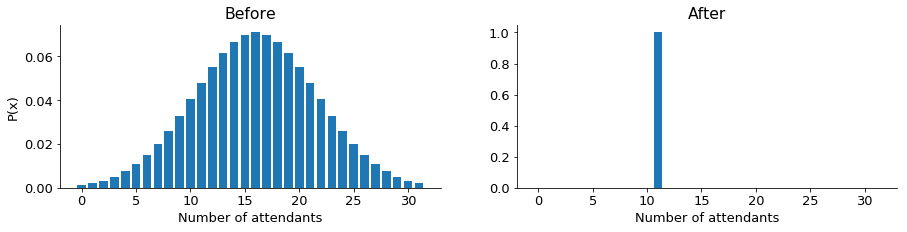

In [32]:
# Illustration of the uncertainty before and after
N = 32  # number of possible outcomes
mu = N/2.  # mean
sigma = N/4.  # standard deviation
x = np.arange(N)  # possible outcomes
p = np.exp(-(x-mu)**2/sigma**2)  # p(x)
p /= p.sum()  # Normalize

# One sample from p(x)
p_cum = np.cumsum(p)
outcome = np.argmax(np.random.rand() < p_cum)  # index of the radom 
y = np.zeros(N)
y[outcome] = 1.

# Plotting
plt.figure(figsize=(15, 3))
ax = plt.subplot(1, 2, 1)
ax.bar(x, p)
ax.set_xlabel('Number of attendants')
ax.set_ylabel('P(x)')
ax.set_title('Before')
ax = plt.subplot(1, 2, 2)
ax.bar(x, y)
ax.set_xlabel('Number of attendants');
ax.set_title('After');


Basado en la idea anterior, Shannon (1948) propuso que una medida de incertidumbre que llamo $ H (p_1, \ldots, p_N) $ por recomendacion de Von Neumann debería poseer las siguientes tres propiedades:
1. $ H $ debe ser continuo en $ p_i $.
2. Si todos los $ p_i $ son iguales, $ p_i = 1 / N $, entonces $ H $ debe ser una función monótonamente creciente de $ N $.
3. Si una elección se puede dividir en dos elecciones sucesivas, los $ H $ originales deben ser una suma ponderada de los valores individuales de $ H $. Por ejemplo: $ H (\frac{1}{2}, \frac{1}{3}, \frac{1}{6}) = H (\frac{1}{2}, \frac{1}{2}) + \frac{1}{2} H (\frac{2}{3}, \frac{1}{3}) $.

***
```
   -----|-----               -----|-----
   |    |    |               |         |   
  1/2  2/6  1/6             1/2       1/2
                             |      ---|---
                             |      |     |
                             |     2/3   1/3
                             |      |     |
                            1/2    2/6   1/6
```
***
Shannon luego pasó a mostrar que la única medida de incertidumbre que satisface las tres propiedades anteriores es de la siguiente forma:

$$
\begin{equation}
H=-\sum_i p_i \log(p_i), 
\end{equation}
$$


donde la base del logaritmo determina la unidad de información (generalmente la base dos que corresponde a los bits). Ver Shannon (1948) o Bialek (2012) para la prueba.

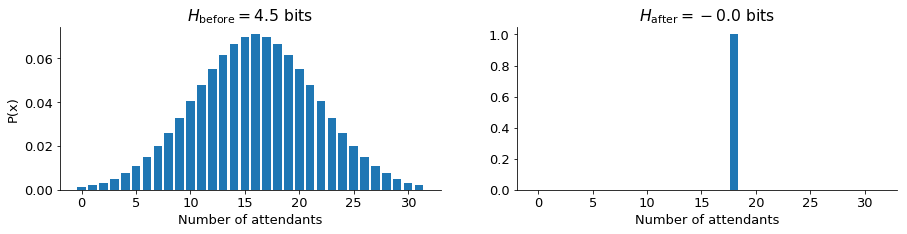

In [34]:
# Uncertanities before and after
H_before = -np.sum(p*np.log2(p))
H_after = -np.sum(y[y>0]*np.log2(y[y>0]))

# Plotting
plt.figure(figsize=(15, 3))
ax = plt.subplot(1, 2, 1)
ax.bar(x, p)
ax.set_ylabel('P(x)')
ax.set_title('$H_\mathrm{before} = %2.1f$ bits' % H_before)
ax.set_xlabel('Number of attendants')
ax = plt.subplot(1, 2, 2)
ax.bar(x, y)
ax.set_title('$H_\mathrm{after} = %2.1f$ bits' % H_after)
ax.set_xlabel('Number of attendants');

## Entropia como medida de incerteza 

Shannon (1948) eligió denotar la medida de incertidumbre en $ H $, y se refirió a ella como entropía debido a su conexión con la mecánica estadística.
> Las cantidades de la forma $ H = -\sum_i p_i \log(p_i) $ desempeñan un papel central en la teoría de la información como medidas de ** información, elección e incertidumbre **. La forma de $ H $ se reconocerá como la de entropía definida en ciertas formulaciones de mecánica estadística donde $ p_i $ es la probabilidad de que un sistema esté en la celda $ i $ de su espacio de fase. $ H $ es entonces, por ejemplo, el $ H $ en el famoso teorema de $ H $ de Boltzman. Llamaremos $ H = -\sum_i p_i\log(p_i) $ la entropía del conjunto de probabilidades $ p_1, \ldots, p_n $.

Aunque fascinante, esta conexión podría, sin embargo, no ser suficiente para proporcionar una imagen intuitiva de los factores que conducen a entropías altas o bajas. En resumen, podemos responder a esta segunda pregunta señalando que 1) la entropía siempre es no negativa, 2) aumenta con el número de resultados posibles, y 3) obtiene su valor máximo para cualquier cantidad fija de resultados cuando todos son igualmente probable.

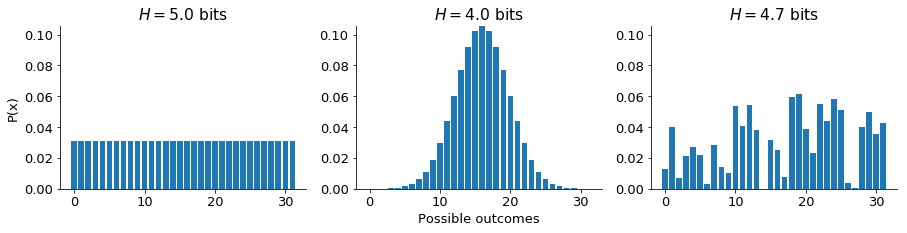

In [35]:
# Entropies for various example distributions
N = 32
mu = N/2.
sigma = N/6.
x = np.arange(N)

# Distributions
p_equal = 1./N*np.ones(N) 
p_normal = np.exp(-(x-mu)**2/sigma**2)
p_normal /= p_normal.sum()
p_random = np.random.rand(N)
p_random /= p_random.sum()
ps = [p_equal, p_normal, p_random]
p_max = np.hstack(ps).max()

# Plotting
plt.figure(figsize=(15, 3))
for idx, p in enumerate(ps, start=1):
    H = -np.sum(p*np.log2(p))
    ax = plt.subplot(1, len(ps), idx)
    ax.bar(x, p)
    ax.set_title('$H = %2.1f$ bits' % H)
    ax.set_ylim([0, p_max])
    if idx == 1:
        ax.set_ylabel('P(x)')
    elif idx == 2:
        ax.set_xlabel('Possible outcomes')
    


La entropía de una distribución, como se presentó anteriormente, también puede derivarse buscando un código de longitud mínima para indicar cada resultado. Es decir, la entropía también representa un límite inferior en la cantidad de bits que uno necesita en promedio para codificar cada resultado. Por ejemplo, imagine que $ N = 4 $ y que las probabilidades son: $ p_1 = 0.5, \: p_2 = 0.25, \: p_3 = 0.125, \: p_4 = 0.125 $. En este caso, los códigos de longitud mínima serían:

| Outcome | Code |
|---------|:----:|
| 1       | 0    |
| 2       | 10   |
| 3       | 110  |
| 4       | 111  |


y la entropía (o longitud promedio del código) $ -0.5 \log (0.5) -0.25 \log (0.25) -2 * 0.125 \log (0.125) = 1.75 $ bits. Bialek (2012) comentó sobre este hecho escribiendo:
>It is quite remarkable that the only way of quantifying how much we learn is to measure how much space is required to write it down.


Del mismo modo, Bialek (2012) también proporcionó el siguiente enlace entre la entropía como un código de longitud mínima y la cantidad de calor necesaria para calentar una habitación:
> La entropía es una idea muy antigua. Surge primero en la termodinámica como una forma de mantener un seguimiento de los flujos de calor, de modo que una pequeña cantidad de calor $ dQ $ transferida a la temperatura absoluta $ T $ genera un cambio en la entropía $ dS = \ frac {dQ} {T} $. Aunque no hay una función $ Q $ que mida el contenido de calor de un sistema, hay una función $ S $ que caracteriza el estado (macroscópico) de un sistema independiente de la ruta a ese estado. Ahora sabemos que la entropía de una distribución de probabilidad también mide la cantidad de espacio necesario para escribir una descripción de los estados (microscópicos) extraídos de esa distribución.

> Imaginemos, entonces, un experimento mental en el que medimos (con alguna resolución finita) las posiciones y velocidades de todas las moléculas de gas en una habitación pequeña y escribimos estos números en un archivo en una computadora. Existen programas relativamente eficientes (gzip, o "compress" en una máquina UNIX) que comprimen los archivos usch a casi la longitud más corta posible. Si estos programas realmente funcionan tan bien como pueden, entonces la longitud del archivo nos dice la entropía de la distribución a partir de la cual se dibujan los números en el archivo, pero esta es la entropía del gas. Por lo tanto, si calentamos la sala por 10 grados y repetimos el proceso, encontraremos que el archivo de datos resultante es más largo. Más profondly, si mido el aumento en la longitud del archivo, sabemos el cambio de la entropía del gas y de ahí la cantidad de calor que se debe agregar a la habitación para aumentar la temperatura. Esta conexión entre una cantidad bastante abstracta (la longitud en bits de un archivo de computadora) y una cantidad física muy tangible (la cantidad de calor agregado a una habitación) me ha parecido por mucho tiempo uno de los ejemplos más dramáticos, aunque elementales, del poder de las matemáticas para unificar descripciones de fenómenos muy dispares.

[Maxwell–Boltzmann distribution](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution)

## Información mutua (Mutual information)


La mayoría de las situaciones no son tan fáciles como el ejemplo del profesor, donde la incertidumbre se eliminó en total una vez que se obtuvo la respuesta. Es decir, en la práctica, a menudo enfrentamos situaciones en las que la incertidumbre solo disminuyó parcialmente. Por ejemplo, imagina una situación en la que se ilumina un punto brillante en una de las 8 ubicaciones horizontales igualmente posibles {$ x \in [0, 1, \ldots, 7] $}, y donde nuestra información sobre la ubicación que se encendió arriba proviene de un detector de luz colocado en una de las ubicaciones. El detector además tiene tres estados {$ y \in [0, 1, 2] $}, y responde con el estado 2 si el punto se muestra en la ubicación donde se encuentra, indique 1 si el punto se muestra en cualquiera de las dos ubicaciones vecinas, y el estado 3 de lo contrario. Suponiendo que el detector se coloca en la ubicación 3, entonces su respuesta a un flash en cualquiera de las ocho ubicaciones es como se muestra a continuación.

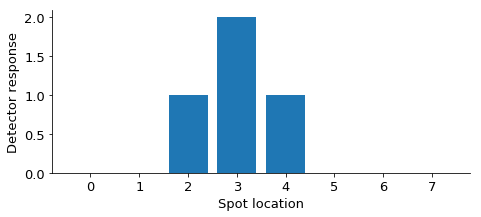

In [36]:
N = 8;  # Eight locations
placement = 3  # The detector's location
responses = np.zeros(N)  # Detector reponses at each location
responses[placement] = 2
responses[placement-1] = 1
responses[placement+1] = 1

# Plotting
plt.figure(figsize=(7.5, 3))
plt.bar(np.arange(N), responses)
plt.xlabel('Spot location')
plt.ylabel('Detector response');



Si ahora expandimos la idea inicial para definir información como la diferencia de entropía entre antes y después de conocer la salida del detector, obtenemos:

$$
\begin{equation}
I(X;Y) = \sum_{i=0}^7 -p(x_i)\log p(x_i) - \sum_{j=0}^2 p(y_j) \sum_{i=0}^7 -p(x_i|y_j) \log p(x_i|y_j).
\end{equation}
$$

Es decir, a partir de la incertidumbre inicial en la ubicación del punto de inflamación $ \sum_{i = 0}^7 -p(x_i) \log p (x_i) $, restamos la incertidumbre que queda para cada posible estado del detector $ \sum_{i = 0}^7 -p (x_i | y_j) \log p (x_i | y_j) $ ponderado por su probabilidad de ocurrencia $ p (y_j) $. Para el caso descrito anteriormente, las distribuciones de probabilidad y las entropías relevantes son:

1.2987949406953987
I=3.00 - 0.62*2.32 - 0.25*1.00 - 0.12*-0.00=1.30


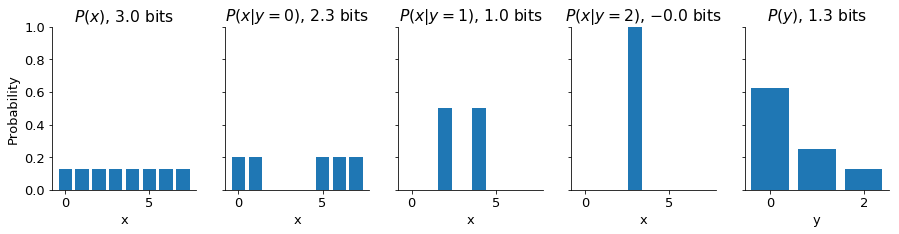

In [37]:
# Probability distributions
px = 1./N * np.ones(N)
px_y0 = np.zeros(N) + np.float64((responses == 0)) / (responses == 0).sum()
px_y1 = np.zeros(N) + np.float64((responses == 1)) / (responses == 1).sum()
px_y2 = np.zeros(N) + np.float64((responses == 2)) / (responses == 2).sum()
py = 1./N * np.array([(responses==r).sum() for r in np.unique(responses)])
ps = [px, px_y0, px_y1, px_y2, py]
titles = ['$P(x)$', '$P(x|y=0)$', '$P(x|y=1)$', '$P(x|y=2)$', '$P(y)$']

# Plotting
Hs = []
plt.figure(figsize=(15, 3))
for idx, p in enumerate(ps, start=1):
    H = -np.sum(p[p>0]*np.log2(p[p>0]))
    Hs.append(H)
    ax = plt.subplot(1, len(ps), idx)
    ax.bar(np.arange(len(p)), p)
    ax.set_ylim([0, 1])
    ax.set_title(titles[idx-1] + ', $%2.1f$ bits' % H)
    if idx < len(ps):
        ax.set_xlabel('x')
    else:
        ax.set_xlabel('y')
    if idx > 1:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Probability')
        
# Calculate and write out the mutual information
mi = Hs[0] - py[0]*Hs[1] - py[1]*Hs[2] - py[2]*Hs[3]
print(mi)
print('I=%3.2f - %3.2f*%3.2f - %3.2f*%3.2f - %3.2f*%3.2f=%3.2f' % (Hs[0], py[0], Hs[1], py[1], Hs[2], py[2], Hs[3], mi))

By further replacing the summation limits with $x\in X$ and $y\in Y$, respectively, we obtain the more general expression:

$$
\begin{equation}
I(X;Y) = \sum_{x\in X} -p(x)\log p(x) - \sum_{y\in Y} p(y) \sum_{x\in X} -p(x|y) \log p(x|y) = H(X) - H(X|Y),
\end{equation}
$$

where $H(X|Y)$ is the conditional entropy (i.e., the average uncertainty that remains ones $y$ is known) and $I$ the mutual information between $X$ and $Y$. Mutual information is thus a generalization of the initial idea that we can quantify what we learn as the difference in uncertainty before and after. 

## Entropía, incerteza e información


Shannon (1948) en realidad enfatizó una interpretación diferente a la presentada anteriormente. Como estaba interesado en el caso en que una fuente envía información a través de un canal ruidoso a un receptor, interpretó la entropía $ H (X) $ en $ I (X; Y) = H (X) - H (X | Y) $ como la información producida por la fuente en lugar de una incertidumbre. Esta interpretación puede entenderse al señalar que la entropía se puede ver como una incertidumbre inicial o como un límite superior de la información aprendida cuando $ H (X | Y) $ es cero (una dualidad que a veces conduce a confusión, especialmente si es mutua la información se abrevia a información solamente). Y en un escenario fuente y receptor, el límite superior obviamente denota la cantidad de información enviada (producida) por la fuente. Estas interpretaciones diferentes pueden parecer innecesarias al principio, pero ayudan a interpretar la simetría de la medida de información mutua. A partir de la expresión de información mutua como se indicó anteriormente, se puede reformular como:

$$
\begin{align}
I(X;Y) &= \sum_{x\in X} -p(x)\log p(x) - \sum_{y\in Y} p(y) \sum_{x\in X} -p(x|y) \log p(x|y) = H(X) - H(X|Y), \quad\quad (1) \\
 &=-\sum_{x\in X}\sum_{y\in Y} p(x, y)\log p(x) + \sum_{y\in Y} \sum_{x\in X} p(x,y) \log p(x|y), \\
 &= \sum_{y\in Y} \sum_{x\in X} p(x,y) \log \frac{p(x|y)}{p(x)}, \\
 &= \sum_{y\in Y} \sum_{x\in X} p(x,y) \log \frac{p(x,y)}{p(x)p(y)} = \dots = H(X) + H(Y) - H(X,Y), \\
 &= \quad \vdots \\
I(Y;X) &= \sum_{y\in Y} -p(y)\log p(y) - \sum_{x\in X} p(x) \sum_{y\in Y} -p(y|x) \log p(y|x) = H(Y) - H(Y|X), \quad\quad (2) 
\end{align}
$$


Shannon interpretó estas dos descripciones como: (1) La información que se envió menos la incertidumbre de lo que se envió. (2) La cantidad de información recibida menos la parte que se debe al ruido. Observe que la expresión (2) dos tiene poco sentido para el ejemplo de detector anterior si $ H (Y) $ se interpreta como incertidumbre, mientras que se vuelve más clara con la interpretación que enfatizó Shannon. Desde ese punto de vista, la expresión (2) nos dice que la información mutua es la información contenida en la respuesta del detector $ H (Y) $ menos la parte que se debe al ruido $ H (Y | X) $. Sin embargo, como el detector es determinista (sin ruido), llegamos a la conclusión de que la información mutua debe ser igual a $ H (Y) $ en nuestro ejemplo particular, que también lo hace.

Además, observamos que la información mutua tiene las siguientes propiedades:
1. Es no negativo e igual a cero solo cuando $ x $ y $ y $ son estadísticamente independientes, es decir, cuando $ p (x, y) = p (x) p (y) $.
2. Está limitado desde arriba por $ H (X) $ o $ H (Y) $, el que sea menor.


## Información mutua como medida general de correlación


Como la información mutua es una medida de dependencia entre dos variables aleatorias, también se puede entender en términos más familiares de correlaciones. Para visualizar esto, imagine una distribución conjunta de dos variables aleatorias ($ X_1 $ y $ X_2 $). Las ecuaciones 1 y 2 anteriores nos dicen que la información mutua se puede obtener como $ H (X) - H (X | Y) $ o $ H (Y) - H (Y | X) $. Es decir, la entropía de cualquier distribución marginal menos la entropía condicional. En términos más prácticos, esto significa que restamos de la incertidumbre promedio que aún se conoce alguna de las variables. Y en términos aún más prácticos, corresponde mirar las filas o columnas individuales en la distribución conjunta, ya que éstas reflejan la incertidumbre que permanece, ya sea que la variable sea conocida. Esto se ilustra a continuación donde dos distribuciones gaussianas multivariantes en 2D se trazan junto con la información mutua entre las dos variables.

H(X1): 3.57 bits
H(X2): 3.57 bits
H(X1,X2)_ind: 7.16 bits
H(X1,X2)_cor: 6.06 bits


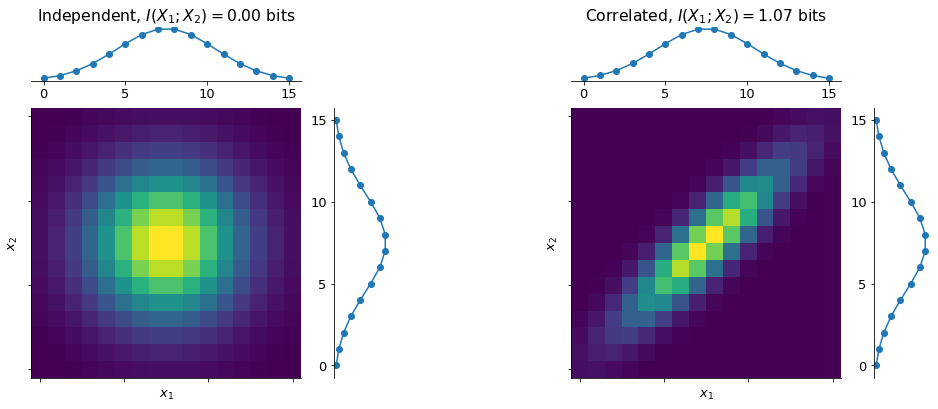

In [45]:
# Generating one independent and one correlated gaussian distribution
N = 16
mu = (N-1) / 2.*np.ones([2, 1])
var = 9.
cov = 8.
cov_ind = np.array([[var, 0.], [0., var]])
cov_cor = np.array([[var, cov], [cov, var]])
[x1, x2,] = np.meshgrid(range(N), range(N))
p_ind = np.zeros([N, N])
p_cor = np.zeros([N, N])
for i in range(N**2):
    x_tmp = np.array([x1.ravel()[i]-mu[0], x2.ravel()[i]-mu[1]])
    p_ind.ravel()[i] = np.exp(-1/2 * np.dot(x_tmp.T, np.dot(np.linalg.inv(cov_ind), x_tmp)))
    p_cor.ravel()[i] = np.exp(-1/2 * np.dot(x_tmp.T, np.dot(np.linalg.inv(cov_cor), x_tmp)))
p_ind /= p_ind.sum()
p_cor /= p_cor.sum()
    
# Calculate I(X1;X2)
p1_ind = p_ind.sum(axis=1)
p2_ind = p_ind.sum(axis=0)
mi_ind = -np.sum(p1_ind*np.log2(p1_ind)) - np.sum(p2_ind*np.log2(p2_ind)) + np.sum(p_ind*np.log2(p_ind))
p1_cor = p_cor.sum(axis=1)
p2_cor = p_cor.sum(axis=0)
mi_cor = -np.sum(p1_cor*np.log2(p1_cor)) - np.sum(p2_cor*np.log2(p2_cor)) + np.sum(p_cor[p_cor>0]*np.log2(p_cor[p_cor>0]))
    
# Plotting
titles = ['Independent', 'Correlated']
p = [p_ind, p_cor]
mi = [mi_ind, mi_cor]
x_ticks = [0, 5, 10, 15]
fig = plt.figure(figsize=(15, 7.5))
for idx, p_tmp in enumerate(p):
    ax = fig.add_axes([0.1 + idx*0.5, 0.1, 0.25, 0.5])
    ax.imshow(p_tmp.reshape(N, N))
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([])
    ax.set_xlabel('$x_1$')
    ax.set_yticks(x_ticks)
    ax.set_yticklabels([])
    ax.set_ylabel('$x_2$')
    ax.invert_yaxis()
    plt.draw()
    pos = ax.get_position()
    ax = fig.add_axes([pos.x0, 0.65, pos.x1-pos.x0, 0.1])
    ax.plot(range(N), p_tmp.sum(axis=1), 'o-')
    ax.set_xticks(x_ticks)
    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(titles[idx] + ', $I(X_1;X_2) = %3.2f$ bits' % mi[idx])
    ax = fig.add_axes([pos.x1 + 0.03, 0.1, 0.1/2, 0.5])
    ax.plot(p_tmp.sum(axis=0), range(N), 'o-')
    ax.set_yticks(x_ticks)
    ax.get_xaxis().set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
print('H(X1): %3.2f bits' % -np.sum(p1_cor*np.log2(p1_cor)))
print('H(X2): %3.2f bits' % -np.sum(p2_cor*np.log2(p2_cor)))
print('H(X1,X2)_ind: %3.2f bits' % -np.sum(p_ind*np.log2(p_ind)))
print('H(X1,X2)_cor: %3.2f bits' % -np.sum(p_cor[p_cor>0]*np.log2(p_cor[p_cor>0])))


Otra forma de entender por qué la correlación de las medidas de información mutua es observar la expresión $ I (X; Y) = H (X) + H (Y) - H (X, Y) $, a partir de la cual observamos que la entropía conjunta $ H (X, Y) $ se resta de la suma de las entropías individuales. A medida que la entropía aumenta con la incertidumbre (o posibles resultados), podemos inferir que una distribución conjunta menos dispersa causará una sustracción más pequeña. De manera importante, sin embargo, la forma de la distribución conjunta no importa, solo qué tan concentrada está la masa de probabilidad en un pequeño número de resultados. Esta es una distinción importante que hace que la información mutua sea una medida general de correlación, en contraste con los coeficientes de correlación usados ​​comúnmente (r de Pearson), que solo captura las correlaciones lineales. El siguiente ejemplo resalta esto al calcular la información mutua y el coeficiente de correlación para una relación lineal y cuadrática entre $ x $ e $ y $.

[4.0, 4.0]
[4.0, 3.0]
[1.0, 0.0]


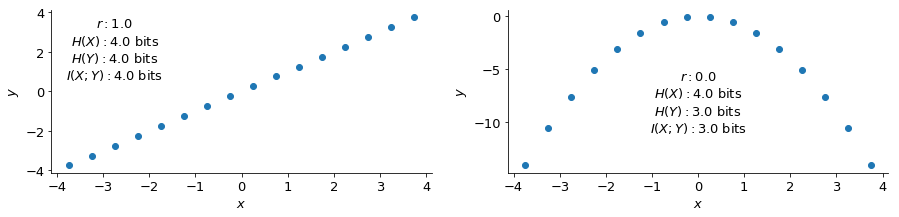

In [49]:
# Generate y responses as y = f(x) for 16 x values with f(x) being either f(x)=x or f(x) = -x^2
x = np.arange(-3.75, 4, 0.5)
y = [x, -x**2]

# Entropies, mutual information, correlation coefficients
Hx = [np.log2(x.size), np.log2(x.size)]  # Assume each x-value is equally likely
print(Hx)
Hy = [np.log2(np.unique(y_tmp).size) for y_tmp in y]
print(Hy)
mi = Hy  # H(Y|X) = 0 as there is no noise, thus I = H(Y) 
r = [pearsonr(x, y_tmp)[0] for y_tmp in y]
print(r)
# Plotting
fig = plt.figure(figsize=(15, 3))
for i in range(len(y)): 
    ax = plt.subplot(1, len(y), i+1)
    ax.plot(x, y[i], 'o')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    info = '$r: %2.1f$\n$H(X): %2.1f$ bits\n$H(Y): %2.1f$ bits\n$I(X;Y): %2.1f$ bits' % (r[i], Hx[i], Hy[i], mi[i])
    ax.text(x[2]-i*x[2], y[i].max()-i*5, info, va='top', ha='center')



La información mutua conserva su valor máximo en ambos casos (recuerde que está limitada desde arriba por min[H (x), H(y)]), mientras que el coeficiente de correlación indica la correlación máxima para el $ f $ lineal y sin correlación para el $ f $ cuadrático. Además, el ejemplo cuadrático proporciona una buena descripción de cómo se puede interpretar la información mutua: si aprendemos 3 bits de información observando $ y $, entonces nuestra incertidumbre sobre $ x $ es un bit $ H (X) - I (X ; Y) $. Esto, a su vez, corresponde a una elección entre dos alternativas igualmente probables, una condición que simplemente refleja que hay dos correlaciones diferentes de $ x $ en el mismo valor $ y $.